In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx', engine='openpyxl', header=0)

df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [50]:
df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

df.head(8)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,전국,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
7,전국,대전광역시,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449


In [51]:
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

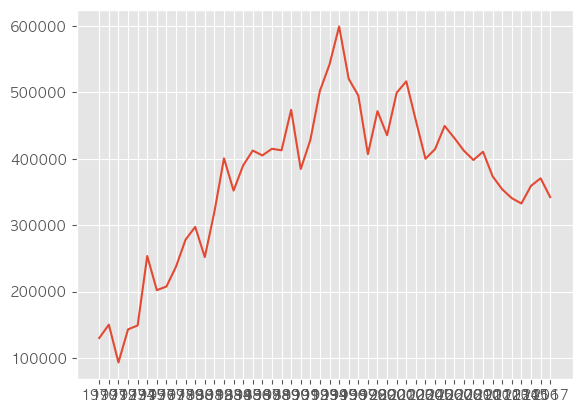

In [52]:
plt.plot(sr_one.index, sr_one.values)

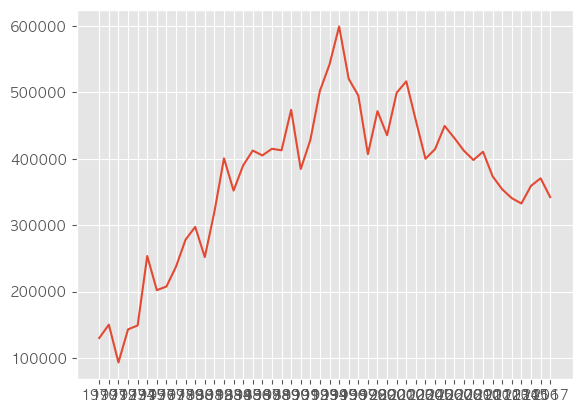

In [53]:
plt.plot(sr_one)

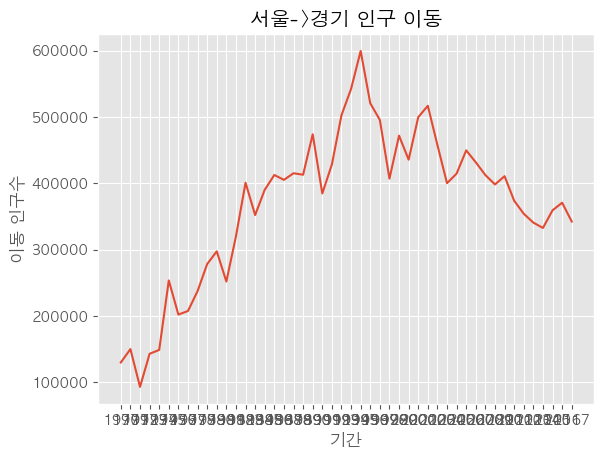

In [54]:
sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index, sr_one.values)

plt.title('서울->경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

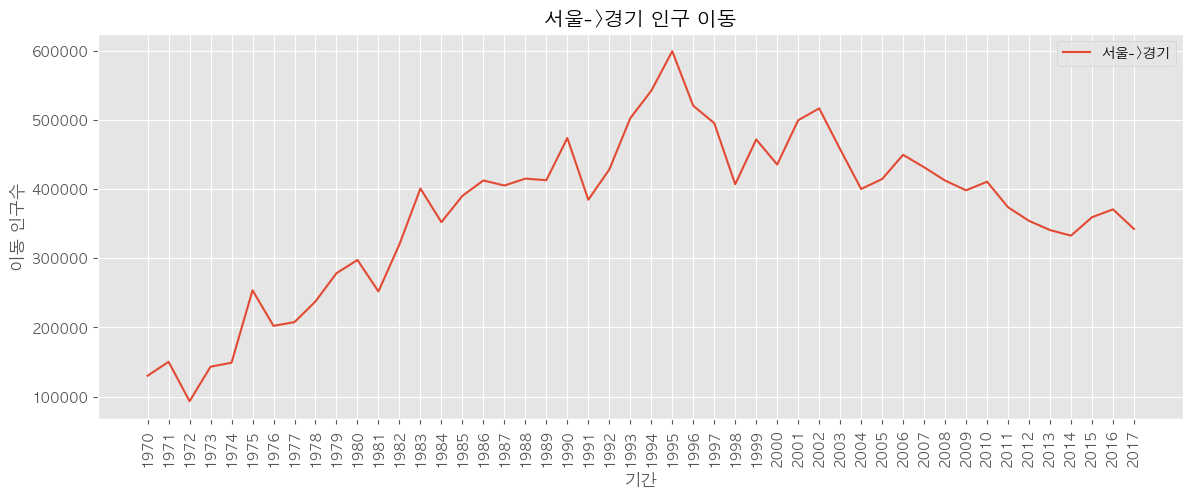

In [55]:
sr_one = df_seoul.loc['경기도']

plt.figure(figsize=(14, 5))

plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values)

plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울->경기'], loc='best')

plt.show()

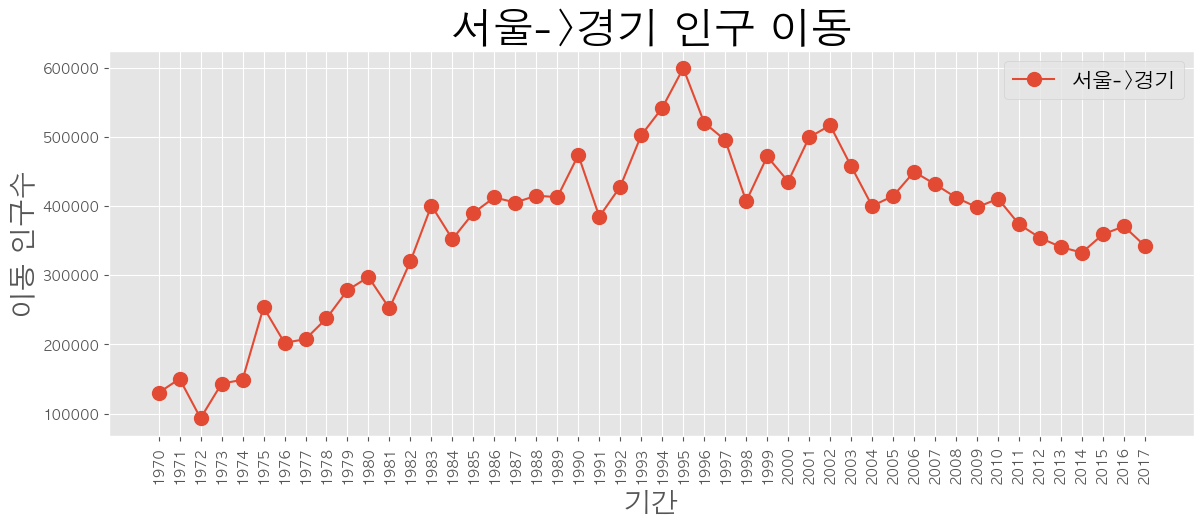

In [56]:
sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울->경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울->경기'], loc='best', fontsize=15)

plt.show()

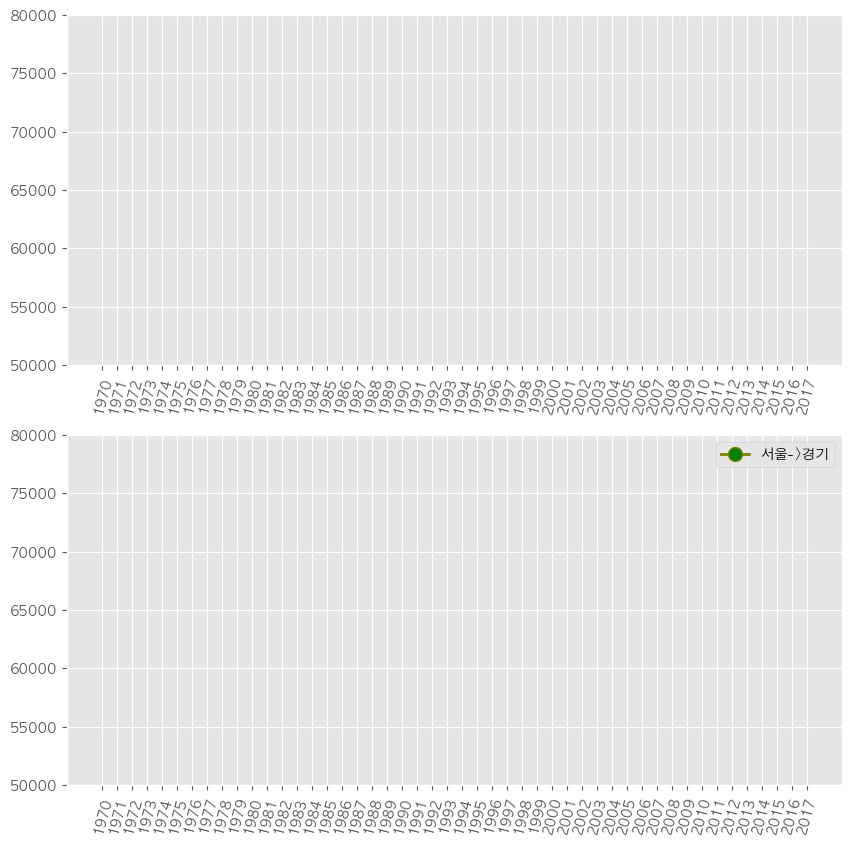

In [57]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

ax1.set_ylim(50000, 80000)
ax2.set_ylim(50000, 80000)
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', labelrotation=75)

plt.show()

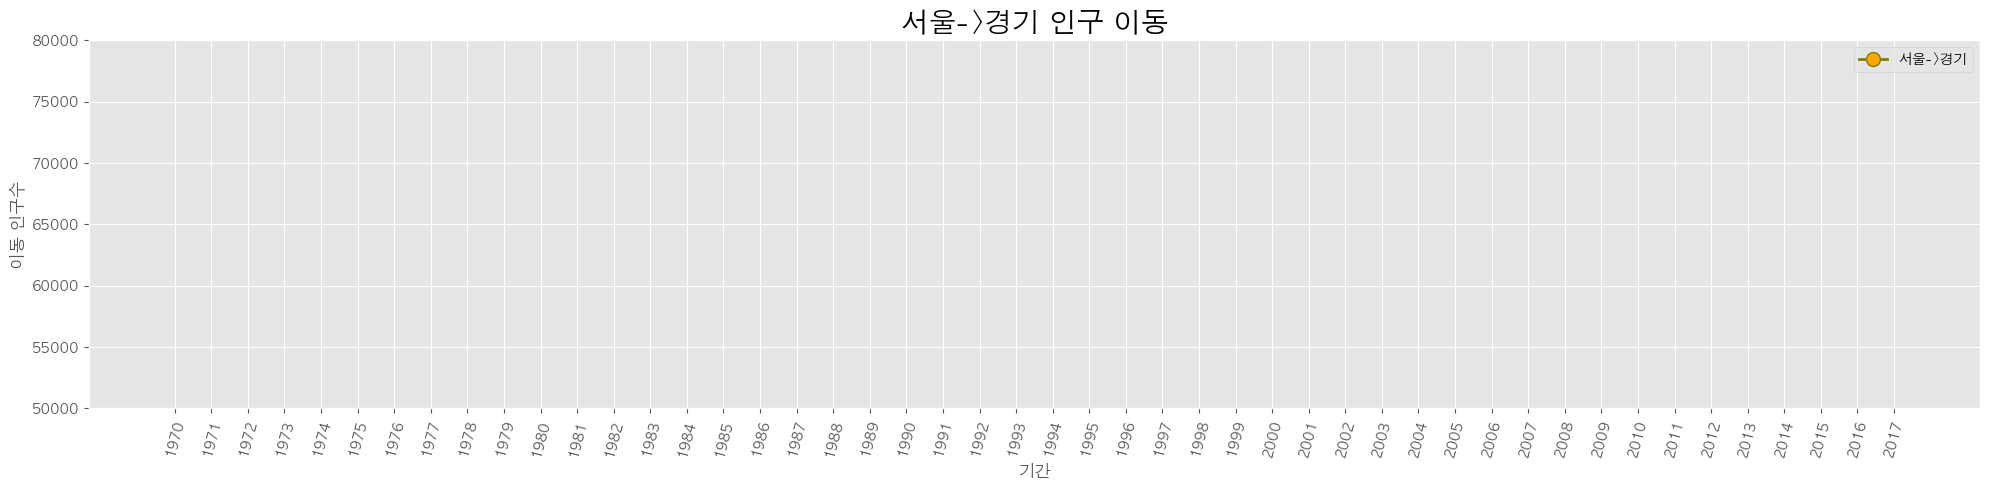

In [58]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(sr_one.index, sr_one.values, marker='o', markerfacecolor='orange', markersize=10, color='olive', linewidth=2, label='서울->경기')
ax.legend(loc='best')

ax.set_ylim(50000, 80000)

ax.set_title('서울->경기 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.tick_params(axis='x', labelrotation=75, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

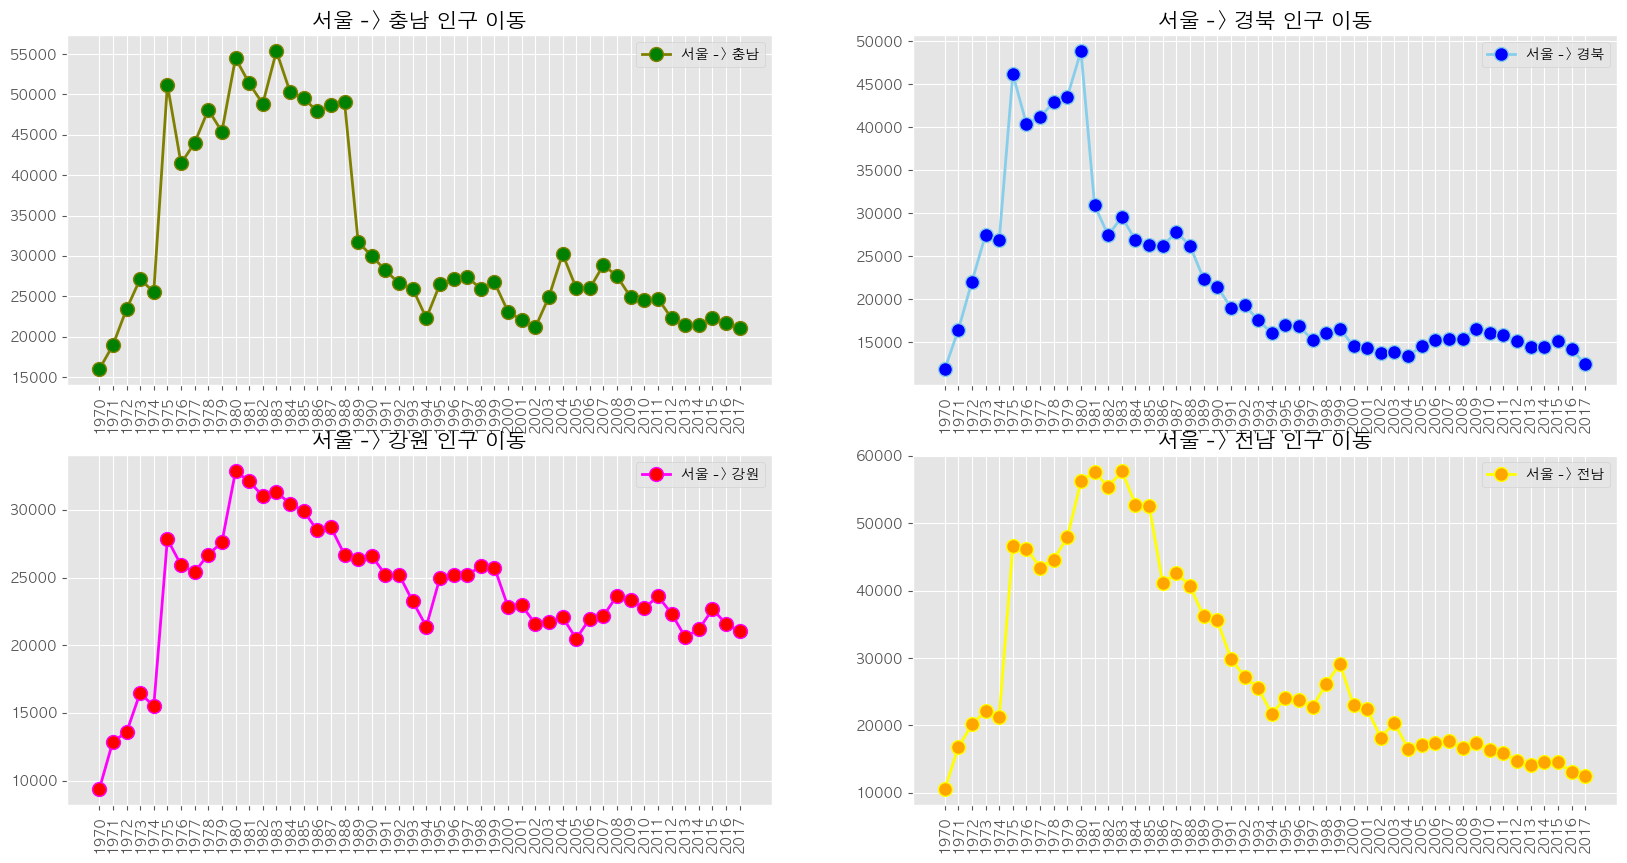

In [59]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

ax1.set_xticks(range(len(col_years)))
ax2.set_xticks(range(len(col_years)))
ax3.set_xticks(range(len(col_years)))
ax4.set_xticks(range(len(col_years)))

ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

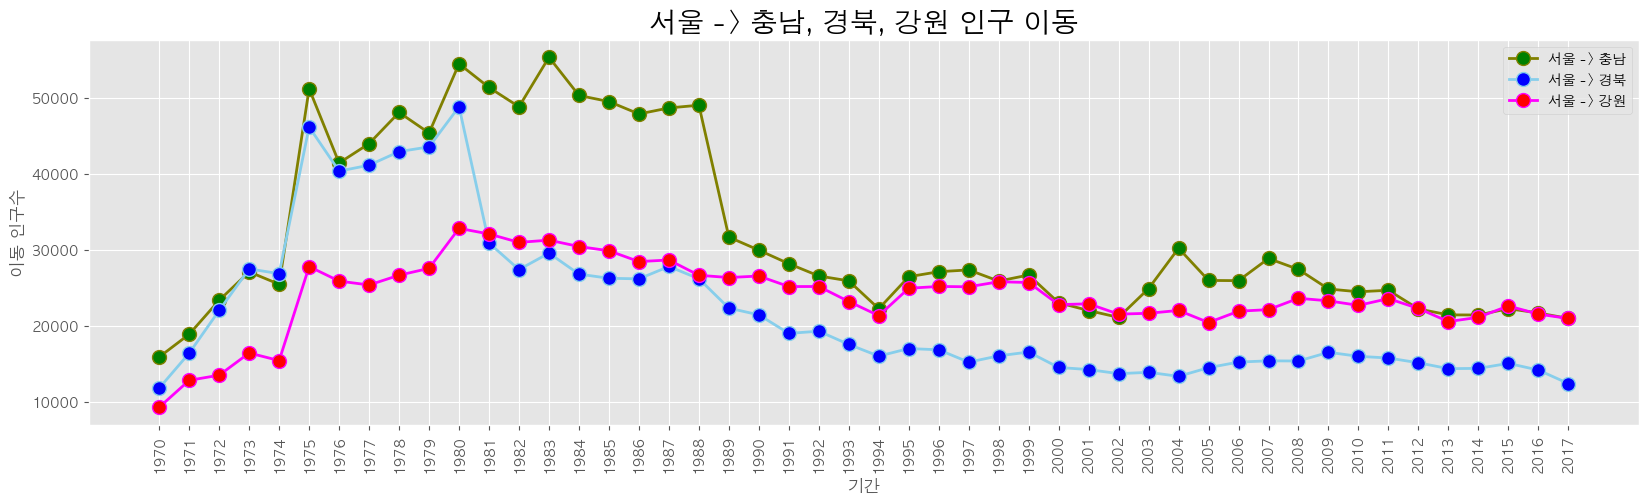

In [60]:
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

ax.set_xticks(range(len(col_years)))

ax.set_xticklabels(col_years, rotation=90)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()